# Stock-Prediction-of-Amazon-using-LSTM

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from keras.models import Sequential 
from keras.layers import LSTM, Dense

# Load the historical stock price data

In [34]:
data = pd.read_csv("D:/yahiya/bharat inter/priyanka/AMZN.csv") 
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data

In [14]:
scaler = MinMaxScaler() 
prices_scaled = scaler.fit_transform(prices)

# Create a time series dataset

In [21]:
look_back = 30  # Number of previous days' prices to consider
X, y = [], []
for i in range(len(prices_scaled) - look_back):
    X.append(prices_scaled[i:i+look_back, 0])
    y.append(prices_scaled[i+look_back, 0])
X, y = np.array(X), np.array(y)

# Split the data into training and testing sets

In [22]:
train_size = int(0.8 * len(X)) 
X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input data for LSTM (samples, time steps, features)

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model

In [24]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model

In [25]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
156/156 [==============================] - 6s 15ms/step - loss: 2.6187e-04
Epoch 2/50
156/156 [==============================] - 2s 14ms/step - loss: 8.7723e-06
Epoch 3/50
156/156 [==============================] - 2s 14ms/step - loss: 8.4225e-06
Epoch 4/50
156/156 [==============================] - 2s 14ms/step - loss: 8.2334e-06
Epoch 5/50
156/156 [==============================] - 2s 15ms/step - loss: 8.4392e-06
Epoch 6/50
156/156 [==============================] - 2s 15ms/step - loss: 7.1809e-06
Epoch 7/50
156/156 [==============================] - 2s 14ms/step - loss: 7.0284e-06
Epoch 8/50
156/156 [==============================] - 2s 14ms/step - loss: 7.1953e-06
Epoch 9/50
156/156 [==============================] - 2s 15ms/step - loss: 6.9103e-06
Epoch 10/50
156/156 [==============================] - 2s 15ms/step - loss: 6.1403e-06
Epoch 11/50
156/156 [==============================] - 3s 16ms/step - loss: 6.0938e-06
Epoch 12/50
156/156 [==============================]

# Make predictions

In [26]:
train_predict = model.predict(X_train) 
test_predict = model.predict(X_test)

39/39 [==============================] - 0s 7ms/step


# Inverse transform the predictions to get actual stock prices

In [27]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE

In [28]:
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 5.395771653961929
Test RMSE: 53.835572649989885


# Plot the results

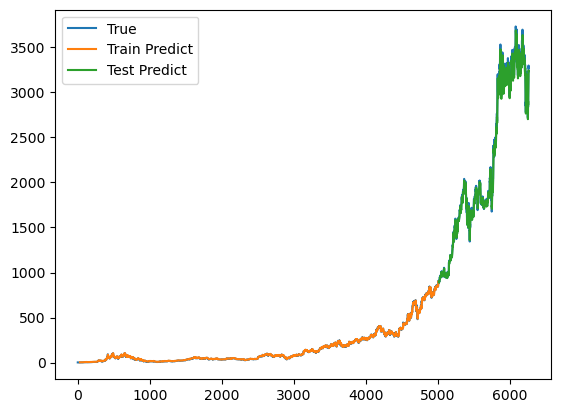

In [29]:
plt.plot(scaler.inverse_transform(prices_scaled), label='True')
plt.plot(np.arange(look_back, look_back + len(train_predict)), train_predict, label='Train Predict')
plt.plot(np.arange(look_back + len(train_predict), len(prices_scaled)), test_predict, label='Test Predict')
plt.legend()
plt.show()